In [113]:
#Movie Recommender using Correlation Analysis of Movie Ratings
#Sanjana Rai - 18BCS0116
#Naveena Koneru - 18BCS0131
import pandas as pd
import matplotlib as plt
import seaborn as sn
import numpy as np

In [56]:
ucolnames = ['id', 'age', 'sex', 'occupation', 'zip']
url=r"C:\Users\sanja\OneDrive\Documents\VIT\4th Sem\Data Mining\DA3\ml-100k\u.user"
users = pd.read_csv(url, names=ucolnames, sep='|' , encoding='latin-1')
users.head()

,id,age,sex,occupation,zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [57]:
rcolnames = ['userID', 'movieID', 'rating', 'unixTimestamp']
url=r"C:\Users\sanja\OneDrive\Documents\VIT\4th Sem\Data Mining\DA3\ml-100k\u.data"
ratings = pd.read_csv(url, sep='\t', names=rcolnames, encoding='latin-1')
ratings.head()

,userID,movieID,rating,unixTimestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [59]:
icolnames = ['movieID', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
url=r"C:\Users\sanja\OneDrive\Documents\VIT\4th Sem\Data Mining\DA3\ml-100k\u.item"
items = pd.read_csv(url, sep='|', names=icolnames, encoding='latin-1')
items.head()

,movieID,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
print(users.shape)
users.head()

(943, 5)


,id,age,sex,occupation,zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
rcolnames = ['userID', 'movieID', 'rating', 'unixTimestamp']
url=r"C:\Users\sanja\OneDrive\Documents\VIT\4th Sem\Data Mining\DA3\ml-100k\ua.base"
url2=r"C:\Users\sanja\OneDrive\Documents\VIT\4th Sem\Data Mining\DA3\ml-100k\ua.test"
ratings_base = pd.read_csv(url, sep='\t', names=rcolnames, encoding='latin-1')
ratings_test = pd.read_csv(url2, sep='\t', names=rcolnames, encoding='latin-1')
ratings_base.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [60]:
print("User Dataset: ")
print(users.shape)
print("Rating dataset: ")
print(ratings.shape)
print("Item Dataset: ")
print(items.shape)

User Dataset: 
(943, 5)
Rating dataset: 
(100000, 4)
Item Dataset: 
(1682, 24)


In [61]:
ratings1=ratings.merge(items,on='movieID', how='left')
ratings1.head()

,userID,movieID,rating,unixTimestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
avgratings=pd.DataFrame(ratings1.groupby('movie title')['rating'].mean())
avgratings.head()

,rating
movie title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [63]:
avgratings['total ratings']=pd.DataFrame(ratings1.groupby('movie title')['rating'].count())
avgratings

,rating,total ratings
movie title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [64]:
movieUser=ratings1.pivot_table(index='userID', columns='movie title', values='rating')
movieUser.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [67]:
correlation=movieUser.corrwith(movieUser['Lion King, The (1994)'])
correlation.head

<bound method NDFrame.head of movie title
'Til There Was You (1997)                0.104828
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.426573
12 Angry Men (1957)                      0.185675
187 (1997)                               0.883883
                                           ...   
Young Guns II (1990)                     0.139279
Young Poisoner's Handbook, The (1995)   -0.386474
Zeus and Roxanne (1997)                 -0.866025
unknown                                  0.866025
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64>

In [34]:
recommendation=pd.DataFrame(correlation, columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation=recommendation.join(avgratings['total ratings'])
recommendation.head()

,Correlation,total ratings
movie title,,
'Til There Was You (1997),0.104828,9
101 Dalmatians (1996),0.426573,109
12 Angry Men (1957),0.185675,125
187 (1997),0.883883,41
2 Days in the Valley (1996),0.260395,93


In [39]:
recsubset=recommendation[recommendation['total ratings']>100].sort_values("Correlation",ascending=False).reset_index()
recsubset.head()

,movie title,Correlation,total ratings
0,"Lion King, The (1994)",1.000000,220
1,"Ice Storm, The (1997)",0.709736,108
2,"Manchurian Candidate, The (1962)",0.544610,131
3,"Craft, The (1996)",0.518510,104
4,Beauty and the Beast (1991),0.516434,202


In [40]:
recsubset=recsubset.merge(items,on='movie title', how='left')
recsubset.drop(recsubset.columns[[3,5,6,7]],axis=1,inplace=True)
recsubset.head(20)

,movie title,Correlation,total ratings,release date,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,"Lion King, The (1994)",1.000000,220,01-Jan-1994,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,"Ice Storm, The (1997)",0.709736,108,01-Jan-1997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Ice Storm, The (1997)",0.709736,108,01-Jan-1997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Manchurian Candidate, The (1962)",0.544610,131,01-Jan-1962,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,"Craft, The (1996)",0.518510,104,26-Apr-1996,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,Beauty and the Beast (1991),0.516434,202,01-Jan-1991,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,Aladdin (1992),0.514440,219,01-Jan-1992,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
7,G.I. Jane (1997),0.498312,175,01-Jan-1997,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,"Firm, The (1993)",0.471582,151,01-Jan-1993,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,My Fair Lady (1964),0.464787,125,01-Jan-1964,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [41]:
items.tail(5)

,movieID,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Schrei%20aus%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df = pd.DataFrame(recsubset,columns=['movie title','total ratings','Correlation'])
print(df)

                          movie title  total ratings  Correlation
0               Lion King, The (1994)            220     1.000000
1               Ice Storm, The (1997)            108     0.709736
2    Manchurian Candidate, The (1962)            131     0.544610
3                   Craft, The (1996)            104     0.518510
4         Beauty and the Beast (1991)            202     0.516434
..                                ...            ...          ...
329                      Kolya (1996)            117    -0.218362
330               Jackie Brown (1997)            126    -0.223684
331             Reservoir Dogs (1992)            148    -0.234065
332       Seven Years in Tibet (1997)            155    -0.266655
333                  Edge, The (1997)            113    -0.588489

[334 rows x 3 columns]


In [84]:
corrMatrix = df.corr()
print (corrMatrix)

               total ratings  Correlation
total ratings       1.000000     0.009469
Correlation         0.009469     1.000000


AttributeError: module 'matplotlib' has no attribute 'show'

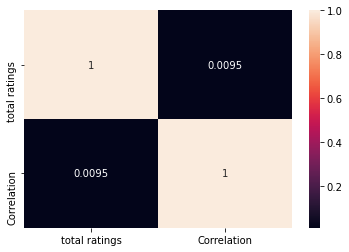

In [85]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

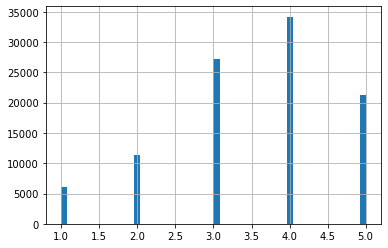

In [87]:
%matplotlib inline
ratings['rating'].hist(bins=50)

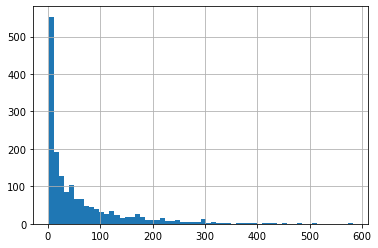

In [92]:
avgratings['total ratings'].hist(bins=60)

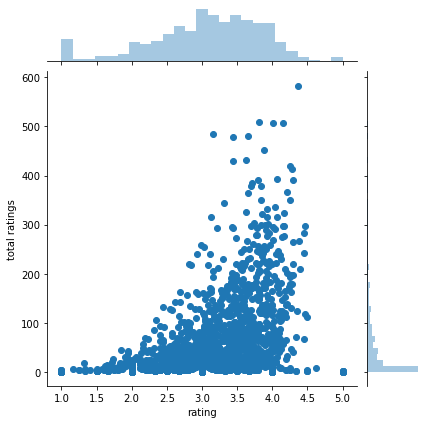

In [96]:
sn.jointplot(x='rating', y='total ratings', data=avgratings)

In [117]:
aladdin_user_rating = movieUser['Aladdin (1992)']
tlk_user_rating = movieUser['Lion King, The (1994)']

In [110]:
aladdin_user_rating.head()

userID
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Aladdin (1992), dtype: float64

In [118]:
tlk_user_rating.head()

userID
1    3.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Lion King, The (1994), dtype: float64

In [115]:
similar_to_aladdin=movieUser.corrwith(aladdin_user_rating)
similar_to_aladdin.head()

movie title
'Til There Was You (1997)   -0.034483
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.385118
12 Angry Men (1957)          0.030291
187 (1997)                   0.609919
dtype: float64

In [119]:
similar_to_tlk=movieUser.corrwith(tlk_user_rating)
similar_to_tlk.head()

movie title
'Til There Was You (1997)    0.104828
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.426573
12 Angry Men (1957)          0.185675
187 (1997)                   0.883883
dtype: float64